In [1]:
#Importing all the needed library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the csv data and checking the data for row level
z_df = pd.read_csv("C:/Users/tejuh/OneDrive/Desktop/Personal/Study/Zomato data.csv")
z_df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
#Checking for any null value and gaining more info on the data
z_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [5]:
#Checking general distribution
z_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
votes,148.0,264.810811,653.676951,0.0,6.75,43.5,221.75,4884.0
approx_cost(for two people),148.0,418.243243,223.085098,100.0,200.00,400.0,600.00,950.0


In [10]:
#Converting the data type of column rate
def handleRate (value) :
    value = str(value).split("/")
    value = value[0]
    return float (value)

z_df['rate'] =z_df['rate'].apply(handleRate)
z_df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Types of restaurant')

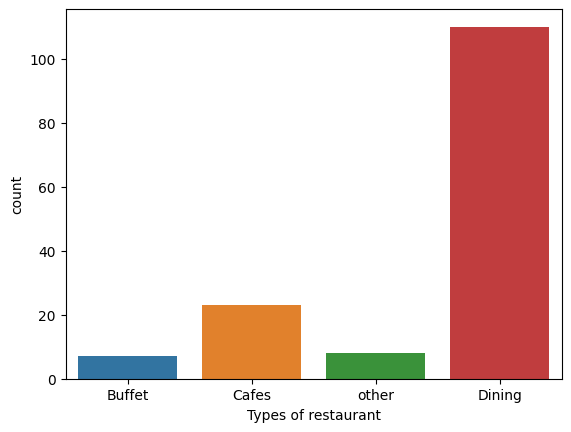

In [13]:
#Types of restaurant the majority customer order from
sns.countplot(x = z_df['listed_in(type)'])
plt.xlabel("Types of restaurant")

Conclusion : Majority type of restaurant customer order from is a Dining type.

In [16]:
#Checking how many votes is received by each type of restaurant
group_data = z_df.groupby('listed_in(type)')['votes'].sum()
print(group_data)

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64


In [26]:
result = pd.DataFrame({'votes' : group_data})
print(result)

                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


Text(0, 0.5, 'Votes')

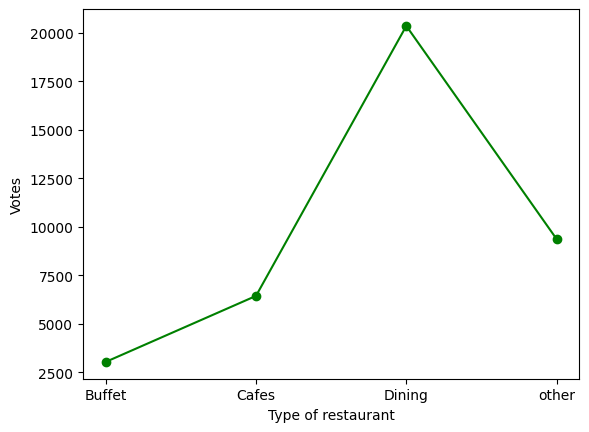

In [27]:
plt.plot(result, c = 'green', marker ='o')
plt.xlabel("Type of restaurant")
plt.ylabel("Votes")

Conclusion : Dining restaurant has received more votes

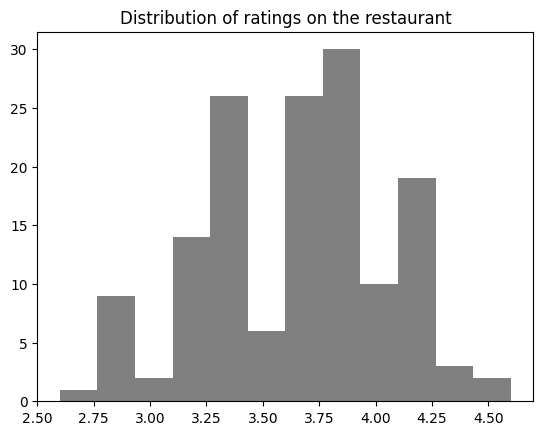

In [33]:
#Checking what type of rating is received by majority of restaurant, creating rating histogram
plt.hist( z_df['rate'],bins =12, color = 'grey')
plt.title("Distribution of ratings on the restaurant")
plt.show()

Conclusion : The majority restaurant received rating of 3.5 to 4

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

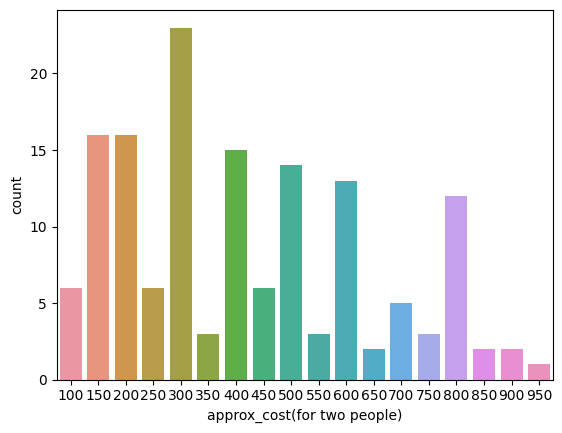

In [36]:
#Find average spending on each order
couple_data = z_df['approx_cost(for two people)']
sns.countplot(x = couple_data)

Conclustion : Majority of couple prefer retaurant with an approx cost of 300 rupees

<Figure size 1200x800 with 0 Axes>

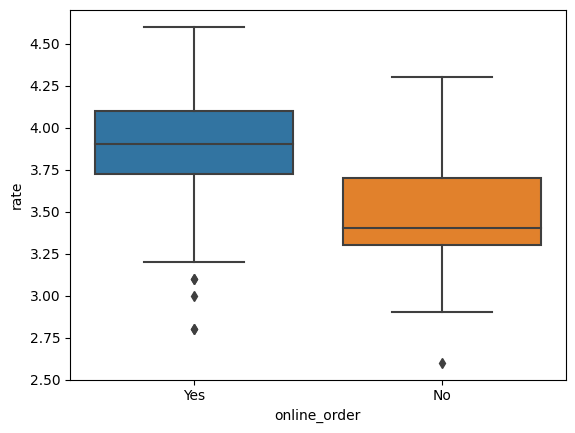

<Figure size 1200x800 with 0 Axes>

In [37]:
#What mode of restaurant gets the most rating
sns.boxplot(x = 'online_order', y = 'rate' , data = z_df)
plt.figure(figsize = (12,8))

Conclusion : Offline order receive less rating in-comparison with online order

In [40]:
#Create a heat map showing what type of restaurant received more offline orders 
pivote_table =z_df.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
print(pivote_table)

online_order     No  Yes
listed_in(type)         
Buffet            3    4
Cafes             8   15
Dining           77   33
other             2    6


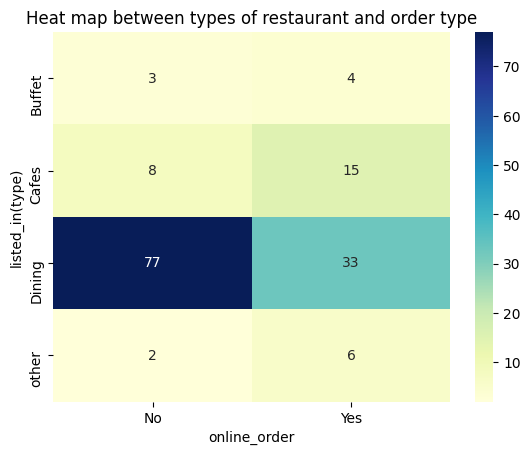

In [45]:
sns.heatmap(pivote_table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title ("Heat map between types of restaurant and order type")
plt.xlabel("online_order")
plt.ylabel("listed_in(type)")
plt.show()

Conclusion : Dining restaurant has more offline order and Cafe received more online orders.